In [10]:
#Importing libraries 
!pip install numpy
!pip install pandas
#for visualization
!pip install matplotlib
!pip install seaborn
#for sentiment analysis
!pip install sklearn   
!pip install nltk
!pip install wordcloud
#for download data by command in jupyter
!pip install wget

In [20]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import json
import wget
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/asset/sample_data.json
    
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/classification-of-yelp-restaurant-reviews-using-sentiment-analysis/asset/sample_data.json'
dataset = wget.download(url)
print(dataset)    

100% [........................................................................] 70142708 / 70142708sample_data.json


In [23]:
rev = pd.read_json('sample_data.json')
rev.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,4686059,aFz1itIWIl7Qojxhpa0VoQ,SsUKdScC6NKcnFFio75wMA,H1ifIm6P1TgCjxM-TOlgTw,1,1,1,0,Ok so now i go to see a movie and homeboy hand...,2016-11-19 20:40:09,2016
1,6762380,s_ba4NB2G2QWS3izLkvl5Q,q5zFh3bhuLy6u7CzYlsa8Q,3r3RHfuLPgRSiRkp5udXSw,5,0,0,0,"It wasn't my choice to eat breakfast here, but...",2019-09-02 17:40:35,2019
2,491263,K1I5yuJICQpInOy-wCCo9A,UqqqBhqlAHiHfB_V3BNmvw,ljGzs5MhfnH1pKfJjFFRlQ,5,0,0,0,The staff is very friendly and I really like D...,2017-06-25 01:27:59,2017
3,6662859,NOwHErM1-u4d8Z6vSS7FwA,cmHaLdW8ssAXK2MKZ2idmw,xoJSkBTusOEt8PPvuw2qEQ,1,0,2,0,I usually have a great experience here but lef...,2017-02-05 20:22:26,2017
4,7361472,JjvOoHUs-OrPEnuUUanDsw,dTSwfFTTHPHwSe48qDkPXg,wTBid_bYRigHAl6vNHYeOQ,5,4,1,1,UPDATE:\nI have been contacted shortly after t...,2016-03-03 17:59:40,2016


In [24]:
#show data size--features--types using shape and type()
print("size of dataset--features are the columns--")
rev.shape
print(rev.info())

size of dataset--features are the columns--
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86354 entries, 0 to 86353
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        86354 non-null  int64         
 1   review_id    86354 non-null  object        
 2   user_id      86354 non-null  object        
 3   business_id  86354 non-null  object        
 4   stars        86354 non-null  int64         
 5   useful       86354 non-null  int64         
 6   funny        86354 non-null  int64         
 7   cool         86354 non-null  int64         
 8   text         86354 non-null  object        
 9   date         86354 non-null  datetime64[ns]
 10  year         86354 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 7.9+ MB
None


In [25]:
# data wrangling and exploratory analysis
#clean data delete unuseful columns and add length of text columns

reviews= rev.drop(['index','review_id', 'user_id', 'business_id', 'date', 'year'], axis=1) #axis true all rows??
reviews['text length'] = rev['text'].apply(len)
reviews.head()

,stars,useful,funny,cool,text,text length
0,1,1,1,0,Ok so now i go to see a movie and homeboy hand...,337
1,5,0,0,0,"It wasn't my choice to eat breakfast here, but...",308
2,5,0,0,0,The staff is very friendly and I really like D...,449
3,1,0,2,0,I usually have a great experience here but lef...,403
4,5,4,1,1,UPDATE:\nI have been contacted shortly after t...,1551


In [26]:
#search for null values because can interfere analysis --> remove or replace
reviews.isnull().any().any()

False

Text(0, 0.5, 'count')

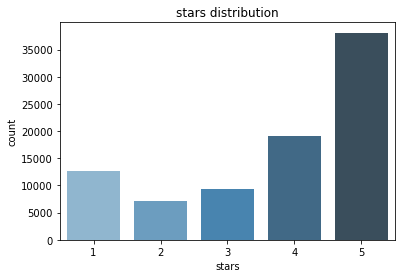

In [27]:
#count plot to display distribution of starts 
cplot = sns.countplot(x='stars', data=reviews, palette='Blues_d')
cplot.set_title('stars distribution')
cplot.set_ylabel('count')
#our data is left-skewed, containing greaer number of 5 stars review

Text(0.5, 1.0, 'Text Length Distribution')

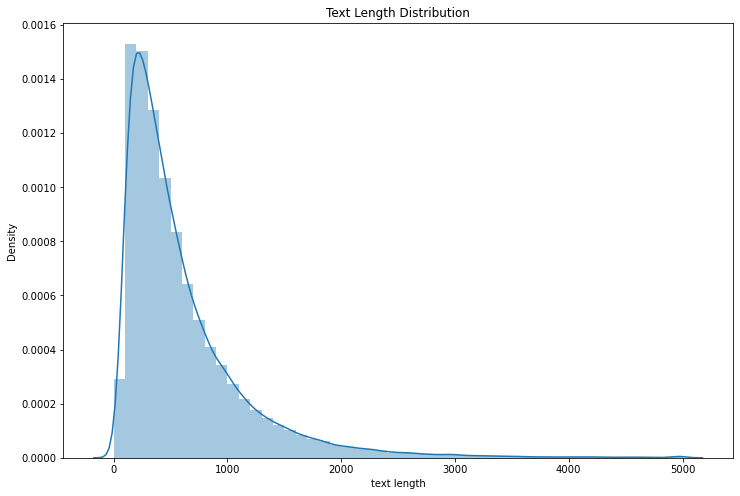

In [30]:
#plot the distribution of the length of a review
fig=plt.figure(figsize=(12,8))
sns.distplot(reviews['text length'], kde=True, bins=50)
plt.title('Text Length Distribution')

In [31]:
#### Data Cleaning
#select only stars and text columns contain all necessary info

text_rev= reviews[['stars','text']]
text_rev.head()

,stars,text
0,1,Ok so now i go to see a movie and homeboy hand...
1,5,"It wasn't my choice to eat breakfast here, but..."
2,5,The staff is very friendly and I really like D...
3,1,I usually have a great experience here but lef...
4,5,UPDATE:\nI have been contacted shortly after t...


In [32]:
#function to remove stopwords ponctuation, convert to lower case--- keep only English reviews

cachedStopWords= stopwords.words('english')

def remove_punc_stopWord(text):
    remove_punc= [word for word in text.lower() if word not in string.punctuation]
    remove_punc= ''.join(remove_punc)
    return [word for word in remove_punc.split() if word not in cachedStopWords] 

In [33]:
cleaned_text= text_rev.copy()
cleaned_text['text']= text_rev['text'].apply(remove_punc_stopWord)

In [34]:
cleaned_text.head()

,stars,text
0,1,"[ok, go, see, movie, homeboy, hands, sheet, wa..."
1,5,"[wasnt, choice, eat, breakfast, boss, paying, ..."
2,5,"[staff, friendly, really, like, dr, hap, denta..."
3,1,"[usually, great, experience, left, extremely, ..."
4,5,"[update, contacted, shortly, review, email, tc..."


In [35]:
#generate frenquecy count and word cloud
#5stars --positive/ 1star -- negative/ 3stars-- neutral/
# but we will use just positive and negative reviews because neutral contain the both and will affect accuracy of our model


In [36]:
# the most frequetly occuring words in negative reviews 
#function and make a plot with 20 most frequently used words in the negative reviews.

#FreqDist  plot
def plotFreq(data):
    FreqDist(np.concatenate(data.text.reset_index(drop=True))).plot(20,cumulative=False)

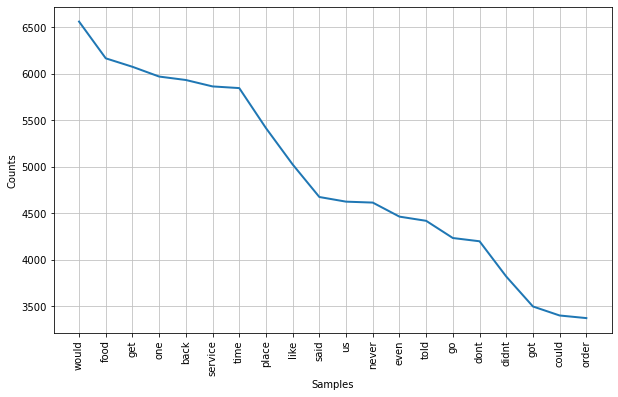

In [37]:
fig= plt.figure(figsize=(10,6))
plotFreq(cleaned_text[cleaned_text['stars']==1])

In [38]:
#Cloud Word plot for the most frequently used words in the negative reviews(if star = 1) and positive reviews(if star=5) .

def reviewCloud(star):
    startext=' '.join(text_rev[text_rev['stars']==star]['text'])
    wordcloud= WordCloud(
        width=3000,
        height=2000,
        background_color='black',
        stopwords=STOPWORDS
    ).generate(str(startext))
    
    fig=plt.figure(
        figsize=(10,7),
        facecolor='k',
        edgecolor='k'
    )
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

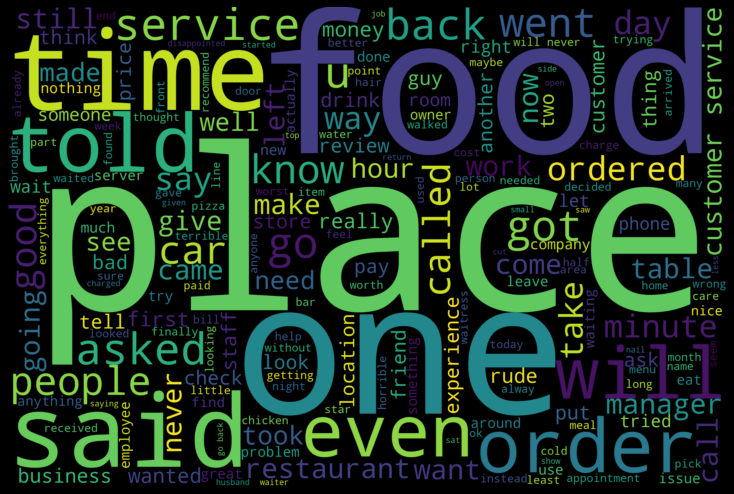

In [39]:
reviewCloud(1)

In [40]:
#A Random Business Sample Analysis
rev.tail()


,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
86349,4601120,D467aq_VXL0SKJqp6SWPTw,RUdrwQexpRQZmICnvX2L5A,as2xQt48ltKKDUQbMCBrMw,4,0,0,0,When you want something healthy and feel like ...,2012-02-17 18:02:35,2012
86350,4320363,KtMR2Eg9wa92doBKm-Kv7Q,AocQ1CuE9-4CnjTtLvr2xg,-GMkoMATTeESkf6bhcNQ3g,5,0,0,0,Awesome service. High class place. Great atmos...,2016-01-17 16:34:22,2016
86351,4712218,csCAeaE-Ao-r_ezw-s3mww,C-itCDFr4rVypaUeJVuAIw,h2mQoTn0y57n94GON_Ku8Q,5,2,0,0,We have loved living at the Place on Ponce. Fr...,2016-05-03 23:31:14,2016
86352,7740980,VTDEeIqVQyKNLaq2Yf0tig,CYtKqfxO78q8MN6HX2JnDg,pLHTsCQLD1LQfnP_4fkPKQ,4,24,1,4,Skyhouse Midtown opened in 2013 so its basical...,2014-05-08 16:27:38,2014
86353,5606878,CGSSvIINJxvSBmrGZn5C-Q,43EpcZApmhG7SdaFJSzidA,xFEyKgGkgOycAsJvVsUzVw,3,0,1,0,sushi isnt like great quality like the ones i ...,2011-04-18 20:52:21,2011


In [41]:
rev.loc[86353,:]

index                                                    5606878
review_id                                 CGSSvIINJxvSBmrGZn5C-Q
user_id                                   43EpcZApmhG7SdaFJSzidA
business_id                               xFEyKgGkgOycAsJvVsUzVw
stars                                                          3
useful                                                         0
funny                                                          1
cool                                                           0
text           sushi isnt like great quality like the ones i ...
date                                         2011-04-18 20:52:21
year                                                        2011
Name: 86353, dtype: object

In [42]:
sushiresto= rev[rev.business_id==rev.loc[86353,:].business_id]
sushiresto.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
17048,5158327,vb-_W-2LaTJUW-Wx0Q0FZg,NAa6fbFwzEKTjASMHPmv_Q,xFEyKgGkgOycAsJvVsUzVw,5,1,1,0,Katsu Currry Chicken is probably the BEST THIN...,2011-10-27 16:22:04,2011
19899,5894590,-Rc5jxwvbGd3pA_78e6U4Q,3mpsIk-UqhedQDxx24UKOw,xFEyKgGkgOycAsJvVsUzVw,5,0,0,0,Great place to have dinner. I was just there ...,2011-09-29 01:46:39,2011
19936,5860246,DSQPhNPgNYJSS3eXaJhXEQ,gqJ5LOG-eg1O_06peeUkLQ,xFEyKgGkgOycAsJvVsUzVw,4,0,0,0,A pretty decent Japanese restaurant. Ordered t...,2015-01-03 14:20:48,2015
25475,5811050,WOkOH97WqY96leXOXJbY5w,JfSEZtYwQiwq_PL68b80PQ,xFEyKgGkgOycAsJvVsUzVw,5,0,0,1,Conveniently located adjacent to the Back Bay ...,2019-08-16 12:44:34,2019
34020,5185078,2nWe8WvFlxa5kt8sLx8itQ,mL6q_AbyQSsoVJIMFwYjfQ,xFEyKgGkgOycAsJvVsUzVw,4,0,0,0,Can't believe I havent been here before in the...,2010-10-07 22:01:40,2010


In [43]:
# specify some words, that we want to extract from our reviews
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']


In [44]:
#Then, we will use Count Vectorizer function to vectorize these words and make an array(don't care about context)
#We vectorize and transform them into an array.
vectorizer= CountVectorizer(vocabulary=selected_words, lowercase=False) 

selected_words_count= vectorizer.fit_transform(sushiresto['text'].values.astype('U'))
vectorizer.get_feature_names()

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [45]:
word_count_array = selected_words_count.toarray()
word_count_array.shape
#print(word_count_array)

(13, 11)

In [46]:
#we extract our features by using the get_feature_names() function,
#convert them to pandas data frame, and add them together using the sum() function
rest = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

<AxesSubplot:>

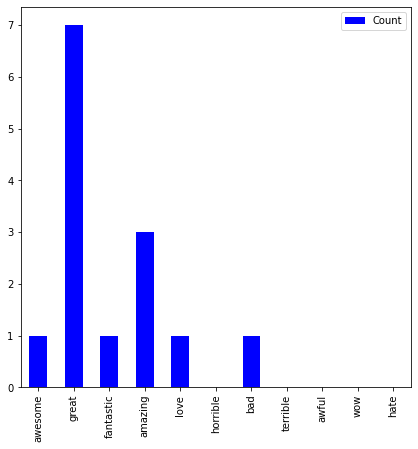

In [51]:
#we are plotting the count of our words
rest.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')

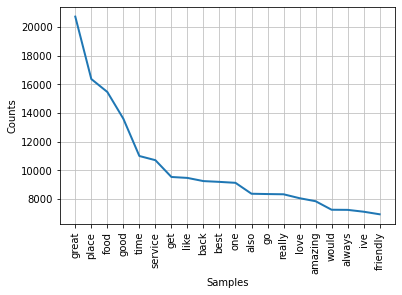

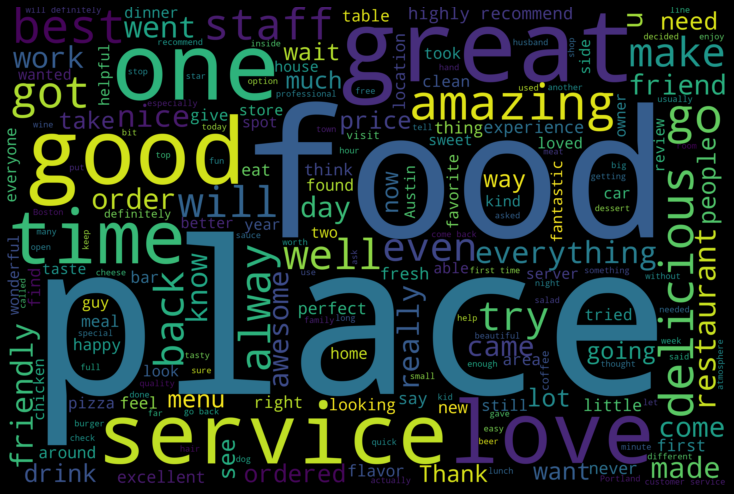

In [53]:
#FOR POSITIVE REVIEWS  5 stars

#FreqDist plot 
plotFreq(cleaned_text[cleaned_text['stars']==5])

#wordCloud plot
reviewCloud(5)

In [68]:
#extract information about what type of food is served in the discussed above restaurant

#extract one resto by business_id 
rev.loc[86340,:]

index                                                    2807873
review_id                                 uQeGv9QvdomRpEJANAvmRA
user_id                                   TZyqtfi28fOsCNXUBuvNbA
business_id                               Ml3RevpxZKmwSmDRNzMY5A
stars                                                          3
useful                                                         0
funny                                                          0
cool                                                           0
text           Went here after a failed attempt to find brunc...
date                                         2011-08-05 20:31:38
year                                                        2011
Name: 86340, dtype: object

In [87]:
#extract one resto by business_id from review 86350
resto=rev[rev.business_id==rev.loc[86350,:].business_id]
resto.head()


,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
7879,4748417,Tdswc77ccGyqvOnyaLf_ZQ,WGWFDooPNb742GmxFq1k8w,-GMkoMATTeESkf6bhcNQ3g,4,0,0,0,"YUM, YUM, YUM! We had breakfast here on our w...",2014-09-03 14:10:41,2014
11880,4475582,cWRzGXmS9cjA4cXxuCIiKA,SvCU2lM06XkAS5UDtN6aWA,-GMkoMATTeESkf6bhcNQ3g,5,2,0,2,"love their flatbread pizza, veggie burger (wit...",2008-05-30 20:54:15,2008
15376,4619797,EVmHL76MzQ5UG3rKKnRG0A,saDA9ni7HPWHNC96Wz8Nrg,-GMkoMATTeESkf6bhcNQ3g,5,0,0,0,"Everything is good, except to know it will be ...",2016-07-31 05:41:06,2016
18721,4486129,z95rtPF96Ud2GrH6a9m25A,E-jq5s8urMVck4VPJf7LQQ,-GMkoMATTeESkf6bhcNQ3g,4,0,0,0,Really nice place. Summers are great cuz then...,2011-12-11 04:41:54,2011
21498,4750523,bDN6T92IXpHtS761kxp69w,JzfebzYzGE2dqw0KZZAdoA,-GMkoMATTeESkf6bhcNQ3g,5,1,0,0,"There's a reason it's the ""Legendary Veritable...",2016-07-23 19:20:56,2016


In [83]:
#type of foods we want to extract
foods=['sushi','flatbread','pizza', 'teriyaki', 'tempura', 'burger', \
                  'soba', 'ramen', 'veggie', 'izakaya']

In [84]:
#Then, we will use Count Vectorizer function to vectorize these words and make an array(don't care about context)
#We vectorize and transform them into an array.

Vectorizer= CountVectorizer(vocabulary=foods, lowercase=False)

food_type_count= Vectorizer.fit_transform(resto['text'].values.astype('U'))

Vectorizer.get_feature_names()


['sushi',
 'flatbread',
 'pizza',
 'teriyaki',
 'tempura',
 'burger',
 'soba',
 'ramen',
 'veggie',
 'izakaya']

In [88]:
foods_array= food_type_count.toarray()
foods_array.shape
#print(foods_array)

(19, 10)

In [90]:
#we extract our features by using the get_feature_names() function,
#convert them to pandas data frame, and add them together using the sum() function

restoDf= pd.DataFrame(index=Vectorizer.get_feature_names(), \
                       data=foods_array.sum(axis=0)).rename(columns={0:'Type Count'}  )

<AxesSubplot:>

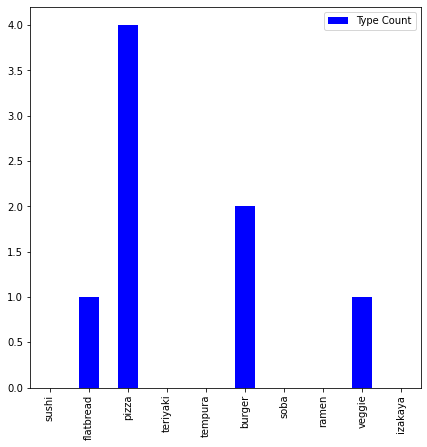

In [91]:
#we are plotting the count of our type of foods
restoDf.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')

In [98]:
#Modeling
#Next, we will build a model to classify our reviews into positive or negative. For this, we will select only '1' and '5' 
#stars reviews to train our model on. We will separate the dataset into x and y variables.
select_stars=text_rev[(text_rev['stars']==1) | (text_rev['stars']==5) ]
select_stars

,stars,text
0,1,Ok so now i go to see a movie and homeboy hand...
1,5,"It wasn't my choice to eat breakfast here, but..."
2,5,The staff is very friendly and I really like D...
3,1,I usually have a great experience here but lef...
4,5,UPDATE:\nI have been contacted shortly after t...
...,...,...
86346,5,I love love love this supermarket! It's full o...
86347,1,"For Christmas, we say buy dinner in Boca. I ca..."
86348,1,Nosedive!\n\nI don't know what happened to thi...
86350,5,Awesome service. High class place. Great atmos...


In [101]:
x=select_stars['text']
y=select_stars['stars']

In [102]:
#before building a model, we need to transform our text into a matrix of token counts.
#We will use CountVectorizer() to perform this task.
#We will also print the dimensions of our matrix, after vectorization. 
#And last, we will split our data into 80% training and 20% testing sets.

In [103]:
#transform data into matrix token using CountVectorizer()
text_vec= CountVectorizer().fit(x)
x= text_vec.transform(x)

In [104]:
print('shape of the sparse matrix=  ', x.shape)

shape of the sparse matrix=   (50802, 57396)


In [111]:
#And last, we will split our data into 80% training and 20% testing sets.
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [112]:
#Multinomial Naive Bayes Model
#In this classification problem, we will use the MultinomialNB() for our classification task. 
#This classifier is suitable for classification with discrete features (in our case, word counts).
#It can also work with fractional counts, such as after TD-IDF transform vectorization

In [115]:
mnb= MultinomialNB()


mnb.fit(x_train, y_train)
predmnb= mnb.predict(x_test)


print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[2239  282]
 [ 480 7160]]
Score: 92.5
Classification Report:               precision    recall  f1-score   support

           1       0.82      0.89      0.85      2521
           5       0.96      0.94      0.95      7640

    accuracy                           0.93     10161
   macro avg       0.89      0.91      0.90     10161
weighted avg       0.93      0.93      0.93     10161



In [116]:
#Using Term Frequency–Inverse Document Frequency transformer(TF-IDF) to transform the data
#we will try an alternative way to tokenize our text, by using the TfidfTransformer()
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x)

x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(x_tfidf,y, test_size=0.2, random_state=42)

mnb_tfidf = MultinomialNB()

mnb_tfidf.fit(x_tfidf_train,y_tfidf_train)
pred_mnb_tfidf = mnb_tfidf.predict(x_tfidf_test)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_tfidf_test,pred_mnb_tfidf))
print("Score:",round(accuracy_score(y_tfidf_test,pred_mnb_tfidf)*100,2))
print("Classification Report:",classification_report(y_tfidf_test,pred_mnb_tfidf))

Confusion Matrix for Multinomial Naive Bayes:
[[1194 1327]
 [  19 7621]]
Score: 86.75
Classification Report:               precision    recall  f1-score   support

           1       0.98      0.47      0.64      2521
           5       0.85      1.00      0.92      7640

    accuracy                           0.87     10161
   macro avg       0.92      0.74      0.78     10161
weighted avg       0.88      0.87      0.85     10161



In [117]:
# In this task, apply Random Forest or any other classifier of choice to see whether the model performance could be 
#improved for both, '1' and '5' star reviews. Some of the possible models to use are:
#Multilayer Perceptron, Gradient Boosting Classifier, XGBoost Classifier, Decision Tree, K Neighbor Classifier,
#Support Vector Machine.

In [118]:
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[1682  839]
 [  93 7547]]
Score: 90.83
Classification Report:               precision    recall  f1-score   support

           1       0.95      0.67      0.78      2521
           5       0.90      0.99      0.94      7640

    accuracy                           0.91     10161
   macro avg       0.92      0.83      0.86     10161
weighted avg       0.91      0.91      0.90     10161



In [119]:
#Predicting
#Now, we can test our MulninomialNB() model to see whether it can predict '1' and '5' star ratings

In [122]:
#positive review
positive_review = text_rev['text'][1]
print(positive_review)
print("Actual Rating: ",text_rev['stars'][1])
pr_t = text_vec.transform([positive_review])
print("Predicted Rating:")
mnb.predict(pr_t)[0]

It wasn't my choice to eat breakfast here, but the boss was paying!
Very simple breakfast options and everything was done to perfection. 10 people in our group and everyone was happy with their food! The service was so perfect with the right amount of sarcasm!
The server did admit to doing open mic stand up
Actual Rating:  5
Predicted Rating:


5

In [131]:
#negative review
negative_review = text_rev['text'][3]
print(negative_review)
print("Actual Rating: ",text_rev['stars'][3])
nr_t = text_vec.transform([negative_review])
print("Predicted Rating:")
mnb.predict(nr_t)[0]

I usually have a great experience here but left extremely disappointed today. I pulled in to the drive thru at 11:55 and they stop serving breakfast sandwiches at noon. I got to the window at 11:58 and they wouldn't sell me a sandwich. Then I still ordered a chai latte which was only 3/4 full. Won't be giving my business to them again, very disappointing since I've had great experiences before today.
Actual Rating:  1
Predicted Rating:


1

In [ ]:
#the MulninomialNB() model, in both cases, has accurately predicted the review rating score.

#Conclusion
#Great work! In this project, while exploring the Yelp Reviews dataset, you have learned about text analysis techniques 
#and how they can be used to extract some information from text.

#You have also learned to apply the Multinomial Naive Bayes model to classify and predict positive and negative sentiments 
#with more than 80% accuracy.